In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from sklearn.model_selection import train_test_split
except:
    from sklearn.cross_validation import train_test_split
from sklearn import linear_model

%matplotlib inline

In [26]:
# Lendo datasets de treino e teste
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [27]:
# Primeiras linhas do DataFrame
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
# Verificando quantas linhas e colunas tem nesse DataFrame
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [29]:
# Verificando como o Pandas está interpretando cada coluna
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [30]:
# Gerando estatísticas de colunas numéricas
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


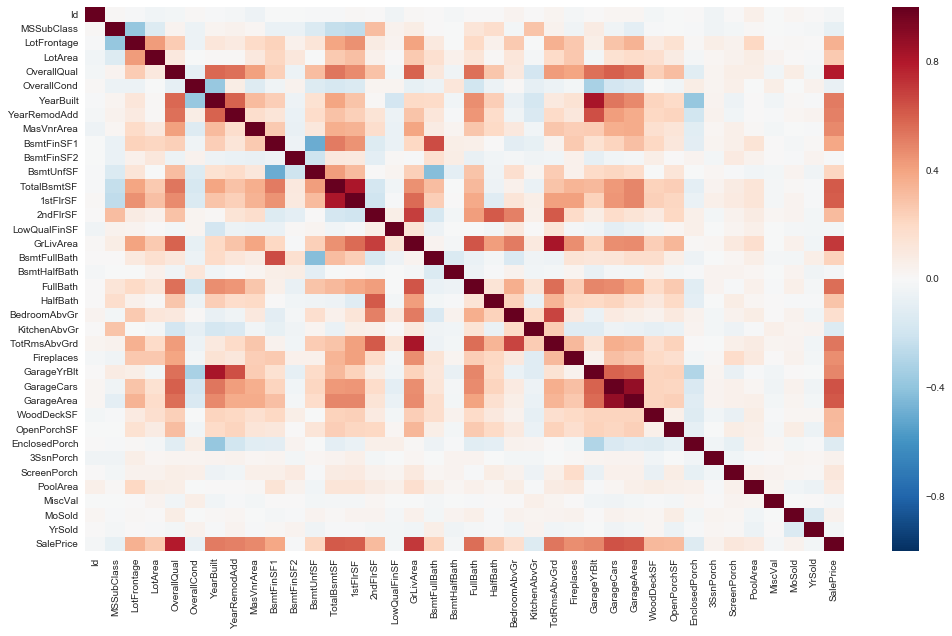

In [31]:
# Gerando gráfico de correlação
plt.figure(figsize=(17,10))
sns.heatmap(df_train.corr())
plt.show()

In [32]:
# Verificando quantidade de valores nulos
df_train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [33]:
# Verificando as colunas que tem maior correlação com a coluna que queremos prever
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

**Aparentemente as colunas que mais tem correlação com a coluna que queremos prever são colunas como: 
OverallQual, GrLivArea, GarageCars. [Consulte a documentação para saber melhor o que cada coluna significa](data_description.txt)**.

In [34]:
# Vamos selecionar apenas as colunas numéricas desse DataFrame
data_train = df_train.select_dtypes(include=np.number)
data_test = df_test.select_dtypes(include=np.number)

In [35]:
# Verificando valores nulos no novo DataFrame
data_train.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
BsmtFinSF1         0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
SalePrice          0
BsmtFullBath       0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
MSSubClass         0
GrLivArea          0
BsmtHalfBath       0
YrSold             0
FullBath           0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
Id                 0
dtype: int64

# Usando interpolação para valores nulos

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/LinearInterpolation.svg/300px-LinearInterpolation.svg.png)

Interpolação linear é uma forma de preenchermos valores nulos de um DataFrame. **Essa técnica consiste em preencher o valor nulo com o dado médio entre dois pontos**. Por exemplo, pegue o exemplo acima. O ponto azulado é o dado nulo, enquanto os pontos vermelhos são os dados mais próximos dele. **No caso da Interpolação Linear, o valor nulo será preenchido com o ponto entre esses dois valores preenchidos**.

In [36]:
# Utilizando a função interpolate para preencher dados nulos com Pandas
data_train = data_train.interpolate()
data_test = data_test.interpolate()

In [37]:
# Normalizando coluna que queremos prever, devido ela ser muito dispersa
data_train['SalePrice'] = np.log(data_train['SalePrice'])

# Treinando o modelo

In [38]:
# Separando dados para treino
# A variável x irá armazenar as features
x = data_train.drop(['SalePrice', 'Id'], axis=1)
# A variável y irá conter a coluna que queremos prever
y = data_train['SalePrice']

In [39]:
# Criando conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)

In [40]:
# Vamos utilizar Regressão Linear para treinar o modelo
reg = linear_model.LinearRegression()

In [41]:
# Treinando o modelo
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
# Verificando a acurácia do modelo
reg.score(X_train, y_train)

0.86370870088043361

In [43]:
# Como possuímos um conjunto de teste, iremos fazer o cross-validation nele usando
# a função .score também
reg.score(X_test, y_test)

0.86275470603352389

In [44]:
# Para "desnormalizar" a coluna em que utilizamos o log
# basta utilizarmos exponenciação
data_test['SalePrice'] = np.exp(reg.predict(data_test.drop('Id', axis=1)))

In [45]:
# Novo dados de teste, agora com a coluna SalePrice prevista
data_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,140,0,0,0,120,0,0,6,2010,119157.135943
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,393,36,0,0,0,0,12500,6,2010,120851.670445
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,212,34,0,0,0,0,0,3,2010,168218.023445
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,360,36,0,0,0,0,0,6,2010,195638.188570
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,82,0,0,144,0,0,1,2010,181909.367798


In [46]:
# Para enviarmos um resultado para o Kaggle, nosso arquivo somente pode contar a coluna ID e SalePrice
data_test = data_test[['Id', 'SalePrice']]

In [47]:
# Criando o arquivo com as previsões
data_test.to_csv('casas_previstas.csv', index=False)

# Conclusão
Agora que você fez todo o processo de criação do seu modelo e previu os dados do conjunto de teste, é hora de submeter seus dados para o Kaggle. [Acesse o site do Kaggle e crie sua conta](http://kaggle.com), após isso, [participe da competição de previsão de casas](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) e submeta o arquivo CSV que geramos na última célula.

Você irá ser adicionado a uma posição no ranking, dependendo do score que aceitou. O desafio agora é melhorar sua posição no ranking. Para tal, adicione e remova features (colunas) de seu modelo. Aplique as técnicas de limpeza que aprendeu e usou nos outros notebooks. Codifique tabelas categóricas e experimente outros modelos. Boa sorte!